<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4314f51bea43>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
boston_df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [9]:
boston_df.drop('Unnamed: 0', axis =1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Task 2. >> 
#### For the "Median value of owner-occupied homes" provide a boxplot

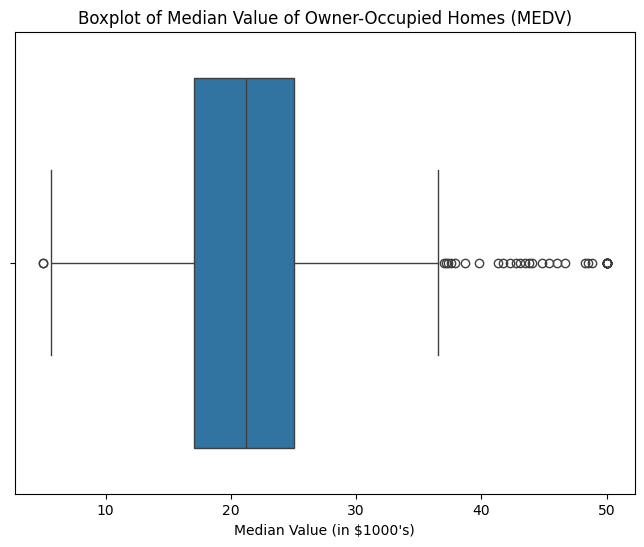

In [20]:
pyplot.figure (figsize = (8,6))
sns.boxplot (x=boston_df['MEDV'])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.xlabel("Median Value (in $1000's)")
pyplot.show()

#### Provide a bar plot for the Charles river variable

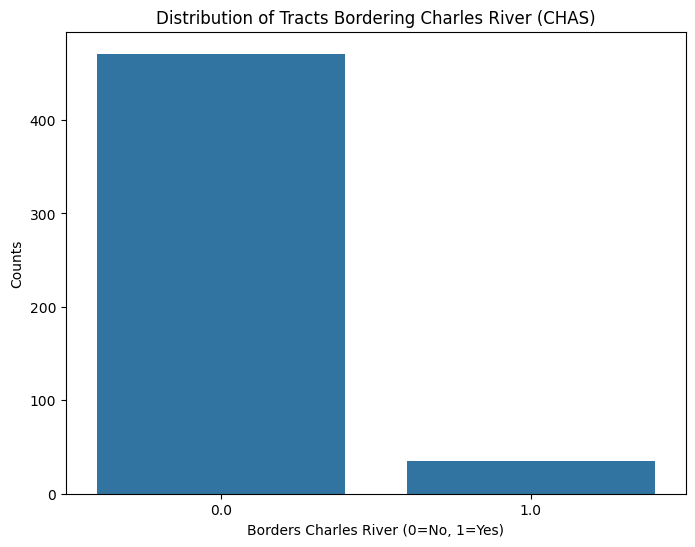

In [23]:
pyplot.figure (figsize = (8,6))
sns.countplot (x=boston_df['CHAS'])
pyplot.title('Distribution of Tracts Bordering Charles River (CHAS)')
pyplot.xlabel('Borders Charles River (0=No, 1=Yes)')
pyplot.ylabel('Counts')
pyplot.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

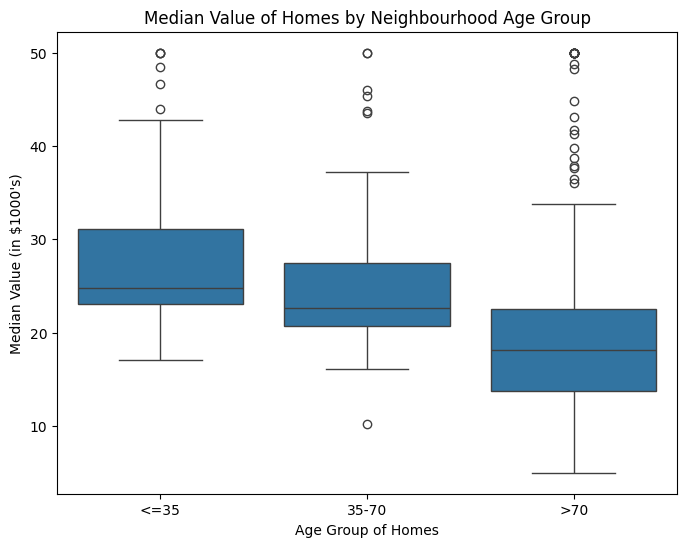

In [20]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['<=35', '35-70', '>70']

boston_df['AGE_GROUP'] = pd.cut (boston_df['AGE'], bins = age_bins, labels = age_labels)

pyplot.figure(figsize=(8,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title("Median Value of Homes by Neighbourhood Age Group")
pyplot.xlabel("Age Group of Homes")
pyplot.ylabel("Median Value (in $1000's)")
pyplot.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

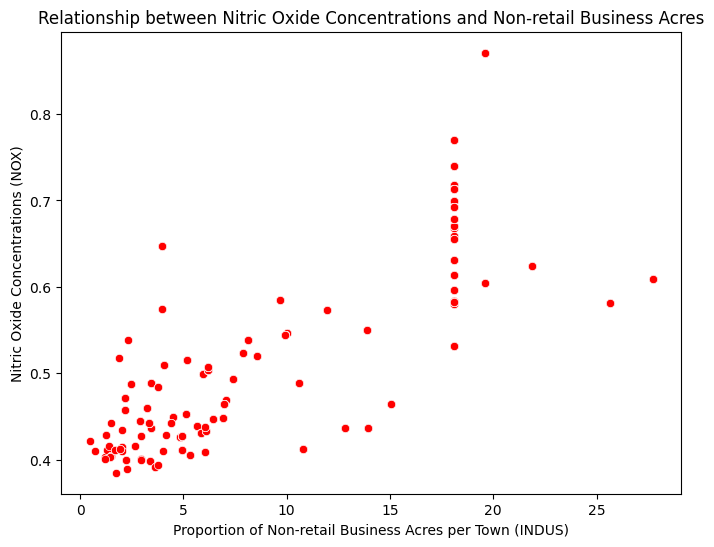

In [26]:
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color = 'red')
pyplot.title("Relationship between Nitric Oxide Concentrations and Non-retail Business Acres")
pyplot.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")
pyplot.show()

#### Create a histogram for the pupil to teacher ratio variable

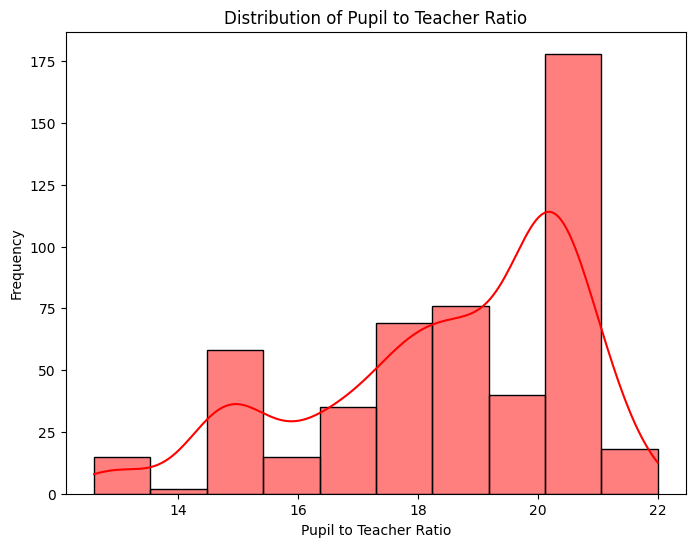

In [33]:
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df["PTRATIO"], bins=10, kde=True, color ='red')
pyplot.title("Distribution of Pupil to Teacher Ratio")
pyplot.xlabel("Pupil to Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

### Task 3. >> Use the appropriate tests to answer the questions provided

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [19]:
# Two separate group
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform T-test
t_stat,p_value = stats.ttest_ind(medv_chas0, medv_chas1)
print (f'T_statistic: {t_stat:4f}')
print (f'P_value: {p_value:4f}')
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is difference in median home values between houses near the Charles River and those that are not."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values between houses near the Charles River and those that are not."

print(conclusion)

T_statistic: -3.996437
P_value: 0.000074
Reject the null hypothesis: There is difference in median home values between houses near the Charles River and those that are not.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [27]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['<=35', '35-70', '>70']

boston_df['AGE_GROUP'] = pd.cut (boston_df['AGE'], bins = age_bins, labels = age_labels)

# Get MEDV values for each group
young = boston_df[boston_df['AGE_GROUP'] == '<=35']['MEDV']
established = boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV']
old = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

 # Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(young, established, old)

print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is significant difference in median home values among different AGE groups."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values among different AGE groups."

print(conclusion)

  F-statistic: 36.4076
  P-value: 0.0000
Reject the null hypothesis: There is significant difference in median home values among different AGE groups.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [11]:
# Perform Pearson correlation test
corr_coef, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

print(f"Pearson Correlation (NOX vs INDUS):")
print(f"  Correlation Coefficient (r): {corr_coef:.4f}")
print(f"  P-value: {p_value:.4f}")


# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a linear relationship between NOX and INDUS."
else:
    conclusion = "Fail to reject the null hypothesis: No linear relationship between NOX and INDUS."

print(conclusion)

Pearson Correlation (NOX vs INDUS):
  Correlation Coefficient (r): 0.7637
  P-value: 0.0000
Reject the null hypothesis: There is a linear relationship between NOX and INDUS.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
X = sm.add_constant(boston_df["DIS"]) 
y = boston_df["MEDV"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
p_value = model.pvalues["DIS"]
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is effect of weighted distance to employment centers on median home value."
else:
    conclusion = "Fail to reject the null hypothesis: No effect of weighted distance to employment centers on median home value."

print(conclusion)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        10:20:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0